In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets

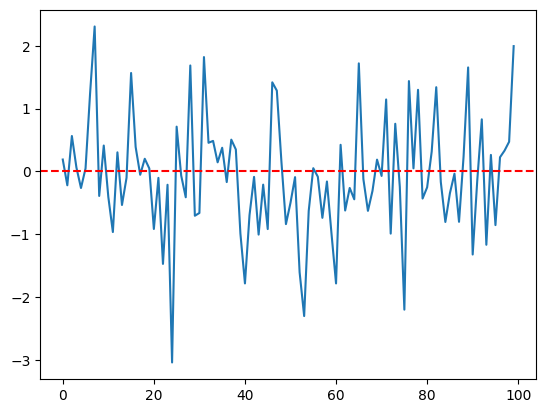

In [2]:
#백색 잡음 (White Noise Process)

data = np.random.normal(0, 1, 100)

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

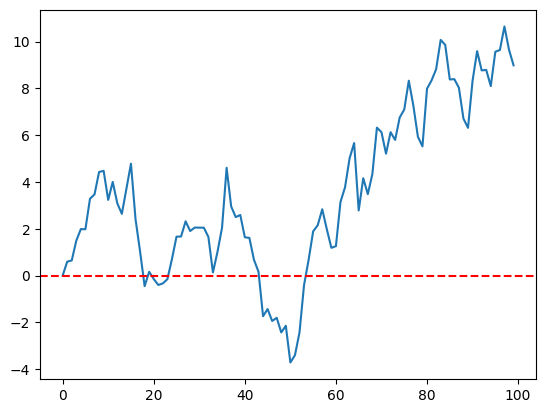

In [3]:
#확률보행과정 (Random Walr Process)

data = np.array([0])

for i in range(99):
  data = np.append(data, data[-1] + np.random.normal(0, 1, 1))

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

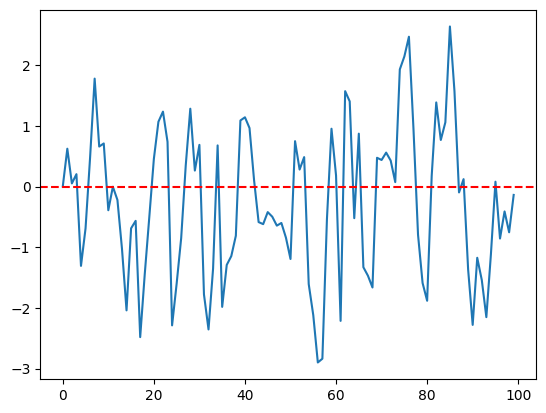

In [4]:
#정상 확률 과정 (Stationary Proecess)

data = np.array([0])
A_corr = 0.5

for i in range(99):
  data = np.append(data, data[-1] * A_corr + np.random.normal(0, 1, 1))

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

In [5]:
#푸리에 신호

def display_signal(sin_w=1, sin_b=1, cos_w = 1, cos_b = 1):
  t = np.arange(0, 3, 1 / 100)
  sin = sin_w * np.sin(2 * np.pi * sin_b * t)
  cos = cos_w * np.cos(2 * np.pi * cos_b * t)
  data = sin + cos

  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(3,1,1)
  ax.plot(sin)
  plt.title('sin', loc='left')
  ax.axhline(0, 0, 100, color='red', linestyle='--')

  ax = fig.add_subplot(3,1,2)
  ax.plot(cos)
  plt.title('cos', loc='left')
  ax.axhline(0, 0, 100, color='red', linestyle='--')

  ax = fig.add_subplot(3,1,3)
  ax.plot(data)
  plt.title('data', loc='left')
  ax.axhline(0, 0, 100, color='red', linestyle='--')

  plt.show()

In [6]:
ipywidgets.interact(display_signal, sin_w = (0, 10, 1), sin_b = (0, 10, 1), cos_w = (0, 10, 1), cos_b = (0, 10, 1))

interactive(children=(IntSlider(value=1, description='sin_w', max=10), IntSlider(value=1, description='sin_b',…

<function __main__.display_signal(sin_w=1, sin_b=1, cos_w=1, cos_b=1)>

In [ ]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=stochastic73&logNo=221553746353
import scipy.stats as stat 

# S 기초자산 가격
# K 행사가
# T 만기
# r 무위험이자율
# sigma 기초자산의 연간 변동성

def BS_model(S, K , T, r, sigma, option_type):
  d1 = (np.log(S / K ) + (r + 0.5 * sigma ** 2 ) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option_type == 'call':
    V = S * stat.norm.cdf(d1) - K * np.exp(-r * T ) * stat.norm.cdf(d2)
  else :
    V = K * np.exp(-r* T) * stat.norm.cdf(-d2) - S * stat.norm.cdf(-d1)
  
  return V

In [ ]:
np.random.normal(0, 1, 1)

In [ ]:
#확률보행과정 (Random Walr Process)

K = 100
sigma = 0.25
rate = 0.03
r = np.log(1.05)
t = 1 / 365

data = np.array([100])
option_price = np.array([BS_model(100, K, t * 99, r, sigma, 'call')])

for i in range(99):
  data = np.append(data, data[-1] + np.random.normal(0, sigma, 1))
  option_price = np.append(option_price, BS_model(data[-1], K, t * (98 - i), r, sigma, 'call'))


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(data)
plt.title('price')
ax.axhline(100, 0, 100, color='red', linestyle='--')

ax = fig.add_subplot(1,2,2)
ax.plot(option_price)
plt.title('option_price')

plt.show()
